In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:

import openslide
import numpy as np
slide = openslide.OpenSlide("/opt/QuickAnnotator/quickannotator/data/test_ndpi/13_266069_040_003 L02 PAS.ndpi")

col,row= 0,0 
tile_size = 2_048

region = slide.read_region((int(col), int(row)), 0, (tile_size, tile_size)) #note: row/col swap is intentional, read_region is  x,y
io_osh  = np.array(region.convert("RGB"))


In [ ]:
%%time
import large_image

ts = large_image.getTileSource("/opt/QuickAnnotator/quickannotator/data/test_ndpi/13_266069_040_003 L02 PAS.ndpi")

im_li, xx = ts.getRegion(
    region=dict(left=col, top=row, width=tile_size, height=tile_size, units='base_pixels'), 
                    scale={'magnification':10},format=large_image.tilesource.TILE_FORMAT_NUMPY)

In [ ]:
ts.getLevelForMagnification(10)

In [ ]:
tile_size40=2048*40//10

In [ ]:
ts.getPointAtAnotherScale((tile_size40,tile_size40), targetScale={'magnification': 10}, targetUnits='mag_pixels') #targetScale=10)#{'magnification':10},targetUnits='base_pixels')

In [ ]:
ts.getPointAtAnotherScale((ts.sizeX,ts.sizeY), targetScale={'magnification': 40}, targetUnits='mag_pixels') #targetScale=10)#{'magnification':10},targetUnits='base_pixels')

In [ ]:
ts.sizeX

In [ ]:
im_li.shape

In [ ]:
(im_li[:,:,0:3]-io_osh).sum()

In [ ]:
ts.getMetadata()

In [ ]:
metadata = ts.metadata
print(metadata['levels'])
print(metadata["downsamples"])

In [ ]:
magnifications = set()
for level in ts.getLevelInfo().values():
    if 'magnification' in level:
        magnifications.add(level['magnification'])

In [ ]:
mag = ts.getMagnificationForLevel(2)
print(mag)

In [ ]:
ts.sizeX,ts.sizeY

In [ ]:
import large_image

ts = large_image.getTileSource("/opt/QuickAnnotator/quickannotator/data/test_ndpi/13_266069_040_003 L02 PAS.ndpi")


In [ ]:

level = 3
size = (tile_size, tile_size)  # (w,h)
location = (0, 0)  # (y,x)


mag = ts.getMagnificationForLevel(0)

tile_image, _ = ts.getRegion(
            region=dict(left=col,
                        top=row,
                        # right=location[1]+size[1],
                        # bottom=location[0]+size[0],
                        units='pixels'),
            tile_size=dict(width=size[1], height=size[0]),
            tile_offset=dict(x=0, y=0),
            scale=dict(level=mag['magnification']),
            format=large_image.constants.TILE_FORMAT_NUMPY,
            encoding="JPEG",
        )
    
        #region=dict(left=col, top=row, width=tile_size, height=tile_size, units='base_pixels'),format=large_image.tilesource.TILE_FORMAT_NUMPY)

In [ ]:
region, info = ts.getRegion(
    scale={'magnification': 10},  # Request 10x magnification
    left=1000, top=1000,  # Adjust coordinates as needed
    width=512, height=512,  # Output region size in pixels
    format=large_image.tilesource.TILE_FORMAT_NUMPY
)

In [ ]:
region, info = ts.getRegion(
    scale={'magnification': 40},  # Request 10x magnification
    left=1000, top=1000,  # Adjust coordinates as needed
    output={'maxWidth': 512, 'maxHeight': 512},  # Control final output size
    format=large_image.tilesource.TILE_FORMAT_NUMPY
)

In [ ]:
region.shape

In [ ]:
tile_image.shape

# H1 BIG stuff down below

In [1]:
def point_to_tileid(tile_size: int, image_width_at_target_mag: int, image_height_at_target_mag: int, x: int, y: int) -> int:
    if not (0 <= x < image_width_at_target_mag and 0 <= y < image_height_at_target_mag):
        raise ValueError(f"Point {x}, {y} is out of image dimensions (0, 0, {image_width_at_target_mag}, {image_height_at_target_mag})")

    col = x // tile_size
    row = y // tile_size
    tile_id = rc_to_tileid(tile_size, image_width_at_target_mag,  row, col)
    return tile_id

def rc_to_tileid(tile_size: int, image_width_at_target_mag: int,  row: int, col: int) -> int:
    tile_id = row * math.ceil(image_width_at_target_mag / tile_size) + col
    return tile_id

In [2]:
def tileid_to_point(tile_size: int, image_width_at_target_mag: int, tile_id: int) -> tuple:
    row, col = tileid_to_rc(tile_size, image_width_at_target_mag, tile_id)
    x = col * tile_size
    y = row * tile_size
    return (x, y)


In [3]:
import math
def tileid_to_rc(tile_size: int, image_width_at_target_mag: int, tile_id: int) -> tuple:
    tiles_per_row = math.ceil(image_width_at_target_mag / tile_size)
    row = tile_id // tiles_per_row
    col = tile_id % tiles_per_row
    return (row, col)


In [4]:
import openslide
import numpy as np
slide = openslide.OpenSlide("/opt/QuickAnnotator/quickannotator/data/test_ndpi/13_266069_040_003 L02 PAS.ndpi")

# col,row= 0,0 
# tile_size = 2_048

# region = slide.read_region((int(col), int(row)), 0, (tile_size, tile_size)) #note: row/col swap is intentional, read_region is  x,y
# io_osh  = np.array(region.convert("RGB"))


this section  is some non-ray testing to see if things work as expected. to use these, remove the @ray annotator in the actor above 

In [5]:
slide.level_downsamples

(1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0)

In [19]:
slide.level_dimensions

((150784, 71936),
 (75392, 35968),
 (37696, 17984),
 (18848, 8992),
 (9424, 4496),
 (4712, 2248),
 (2356, 1124),
 (1178, 562),
 (589, 281))

In [6]:
slide.level_dimensions[2]

(37696, 17984)

In [8]:
# 33062,29855 random xy coordinate that has tissue
tile_size = 2048
targetx=33062//slide.level_downsamples[2]#15342 #random   --- #targetMag_x
targety=29855//slide.level_downsamples[2]#9232 #random

In [12]:
tileid=point_to_tileid(tile_size,slide.level_dimensions[2][0],slide.level_dimensions[2][1],targetx,targety) #stored in DB
print(f"{tileid=}")

tileid=61.0


In [13]:
tilex,tiley=tileid_to_point(tile_size,slide.level_dimensions[2][0],tileid)

In [14]:
print(tilex,targetx)
print(tiley,targety)
assert tilex<=targetx and tilex+tile_size>=targetx
assert tiley<=targety and tiley+tile_size>=targety

8192.0 8265.0
6144.0 7463.0


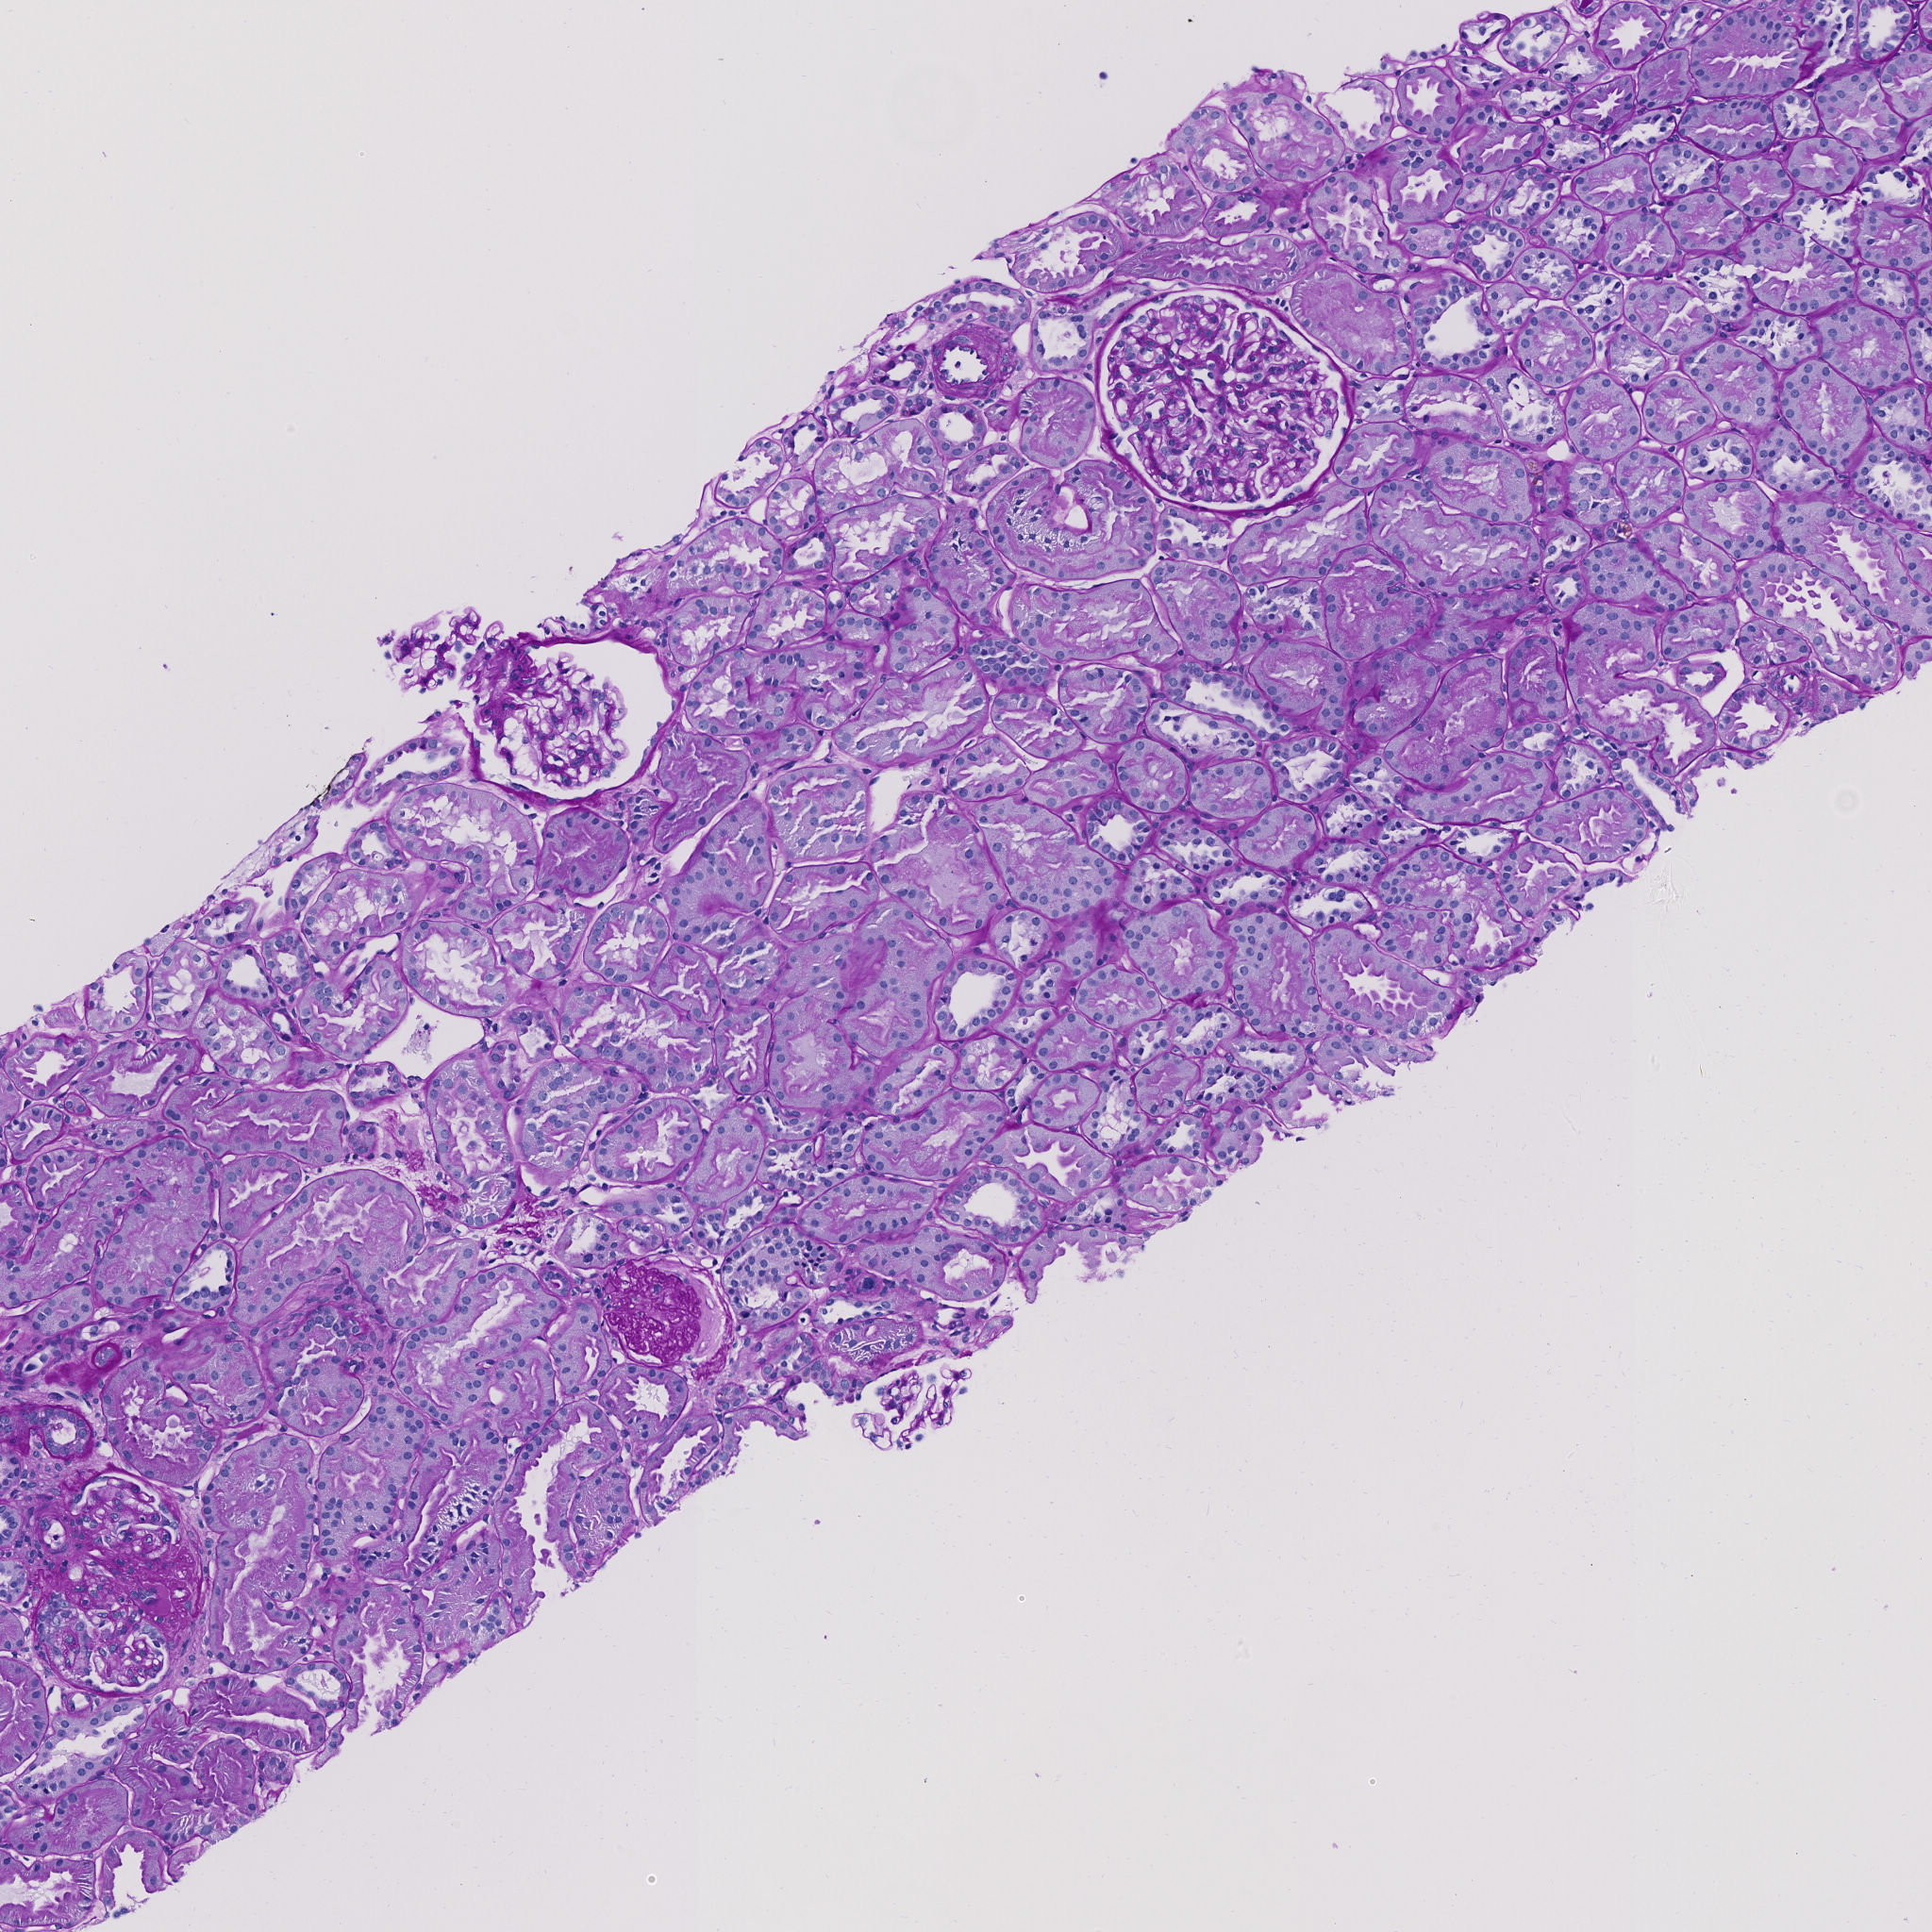

In [15]:
import openslide
import numpy as np
 
slide = openslide.OpenSlide("/opt/QuickAnnotator/quickannotator/data/test_ndpi/13_266069_040_003 L02 PAS.ndpi")

slide.level_downsamples[2]
osh_region = slide.read_region((int(tilex*slide.level_downsamples[2]), int(tiley*slide.level_downsamples[2])), 2, (tile_size, tile_size)) #note: openslide works at base mag!
io_osh  = np.array(osh_region.convert("RGB"))
osh_region

In [16]:
io_osh.shape

(2048, 2048, 3)

In [ ]:
%%time
import large_image

ts = large_image.getTileSource("/opt/QuickAnnotator/quickannotator/data/test_ndpi/13_266069_040_003 L02 PAS.ndpi")


im_li, xx = ts.getRegion(
    region=dict(left=tilex, top=tiley, width=tile_size, height=tile_size, units='pixels'), 
                    scale={'magnification':10},format=large_image.tilesource.TILE_FORMAT_NUMPY) #everything here is at 10x magnification!
                    #base_pixels --- > measurement in pixels at the base magnification

im_li=im_li[:,:,0:3]

CPU times: user 168 ms, sys: 66.8 ms, total: 235 ms
Wall time: 254 ms


In [18]:
(im_li-io_osh).sum()

0

In [21]:
ts.getMetadata()

{'levels': 11,
 'sizeX': 150784,
 'sizeY': 71936,
 'tileWidth': 256,
 'tileHeight': 256,
 'magnification': 40.0,
 'mm_x': 0.00022617270547790292,
 'mm_y': 0.00022617270547790292,
 'dtype': 'uint8',
 'bandCount': 4}